<a href="https://colab.research.google.com/github/swastikbanerjee/CV_Lab/blob/main/cv_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Original Image

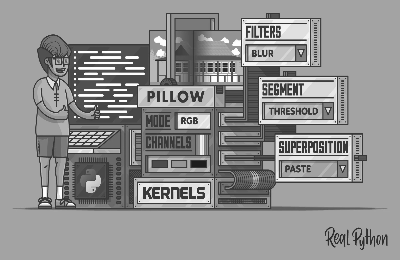

In [11]:
image = cv2.resize(cv2.imread('/content/Image-Processing-in-Python-With-Pillow_Watermarked.webp', cv2.IMREAD_GRAYSCALE), (400,260))
cv2_imshow(image)

Mean Filter (using Library Func.)

array([[163, 163, 163, ..., 163, 163, 163],
       [163, 163, 163, ..., 163, 163, 163],
       [163, 163, 163, ..., 163, 163, 163],
       ...,
       [163, 163, 163, ..., 163, 163, 163],
       [163, 163, 163, ..., 163, 163, 163],
       [163, 163, 163, ..., 163, 163, 163]], dtype=uint8)
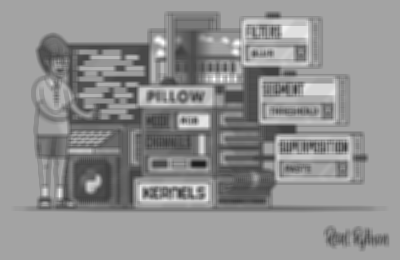

In [12]:
cv2.blur(image, (5, 5))

Gaussian Filter (using Library Func.)

array([[163, 163, 163, ..., 163, 163, 163],
       [163, 163, 163, ..., 163, 163, 163],
       [163, 163, 163, ..., 163, 163, 163],
       ...,
       [163, 163, 163, ..., 163, 163, 163],
       [163, 163, 163, ..., 163, 163, 163],
       [163, 163, 163, ..., 163, 163, 163]], dtype=uint8)
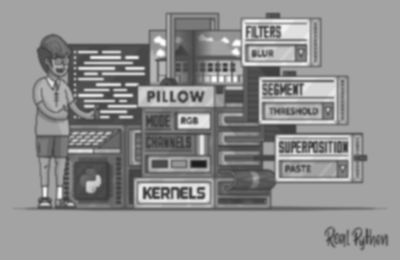

In [13]:
cv2.GaussianBlur(image, (5, 5), 0)

Laplacian Filter (using Library Func.)

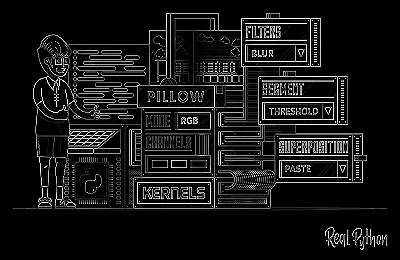

In [14]:
cv2_imshow(cv2.Laplacian(image, cv2.CV_64F))

Custom Func. Definition

In [15]:
def linear_spatial_filter(img, krnl):
  imh, imw = img.shape
  krh, krw = krnl.shape
  pah = krh // 2
  paw = krw // 2
  padim = np.pad(img, ((pah, pah), (paw, paw)), mode='constant')
  outim = np.zeros_like(img)
  for i in range(imh):
    for j in range(imw):
      outim[i, j] = np.sum(padim[i:i+krh, j:j+krw] * krnl)
  return outim.astype(np.uint8)

Mean Filter Implemented

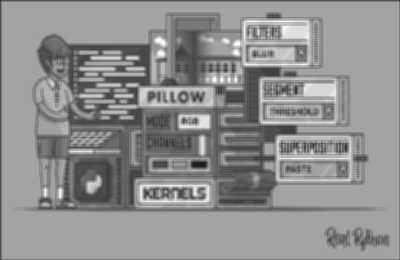

In [16]:
kernel = np.ones((4,4))/16
filtered_image = linear_spatial_filter(image, kernel)
cv2_imshow(filtered_image)

Gaussian Filter Implemented

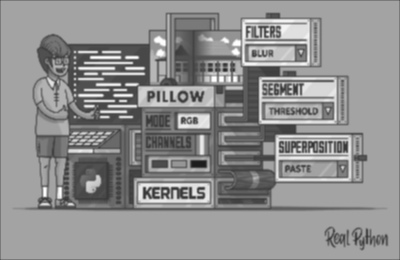

In [17]:
kernel = 1/16*np.array([[1, 2, 1],
                        [2, 4, 2],
                        [1, 2, 1]])
filtered_image = linear_spatial_filter(image, kernel)
cv2_imshow(filtered_image)

Laplacian Filter Implemented

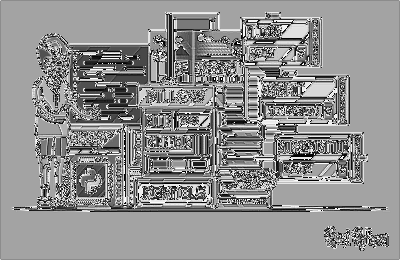

In [18]:
kernel = np.array([[-1,-1,-1],
                   [-1, 9,-1],
                   [-1,-1,-1]])
filtered_image = linear_spatial_filter(image, kernel)
cv2_imshow(filtered_image)